# Kernel Recursive Least Squares (KRLS) & Kernel Least Mean Squares

Example: Time series prediction

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from knlms import *

In [5]:
num_data = 3000
num_experiments = 200

# AWGN
v = 0.1*np.random.normal(0,1,num_data+2) 

# Initial conditions
d_true =[0.1 , 0.1]
d = [d_true[0] + v[0], d_true[1] + v[1]]

# Grab new data
new_d_true = lambda d: d.append((0.8 - 0.5 * np.exp(-(d[-1]**2)))*d[-1] - (0.3 + np.exp(-(d[-1]**2)))*d[-2] + 0.1*np.sin(np.pi*d[-1]))
for i in range(2,num_data+2):
    new_d_true(d_true)
    d.append(d_true[-1] + v[i])
d_true = d_true[2::]
d = d[2::]

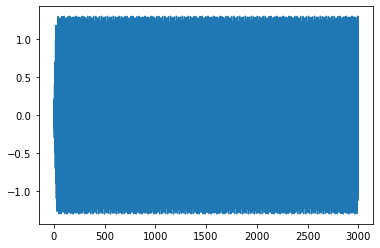

In [6]:
plt.plot(range(len(d_true)),d_true)

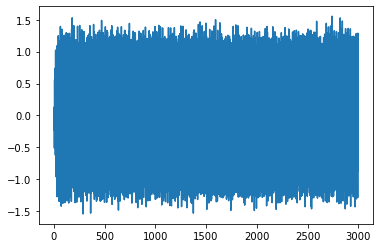

In [7]:
plt.plot(range(len(d)),d)

In [8]:

# Kernel from Richard Paper

gauss_kernel = lambda u_i,u_j: np.exp(-3.73 * (np.linalg.norm(u_i - u_j,ord=2)**2))
nmse = lambda D_n, Phi_n: np.sum((D_n - Phi_n)**2)

kernel = gauss_kernel


step_size = 0.09
reg_coeff = 0.03
threshold = 0.5


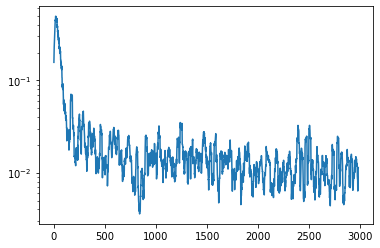

In [9]:
KNLMS(d,d_true,kernel,step_size,reg_coeff,threshold)

In [ ]:
# KRLS

# Kernel Recursive Least Sqaures depends on a kernel functionin which to evaluate the points in a higher 
# dimension without needing to create and analyaze in the higher dimensional plane as this would create
# significant computing cost

# The use of kernel functions are valuable as they transform the data into another plane in which they become
# easy to evaluate

# for this demonstration we will be utilizing the guassian kernel function